In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg
from tqdm import tqdm
# import networkx as nx
import numpy as np
import cvxpy as cvx
from pprint import pprint
from random import shuffle
import time
from contagion import binarize_probabilities, distribute_liabilities, make_connections, DeterministicRatioNetwork, TestNetwork

In [2]:
defaults_to_freq = {}

for _ in range(30):
    cash_vector = np.random.normal(10000, 10000, 100)
    cash_vector[cash_vector <= 0] = 1*10**-10
    # cash_vector[cash_vector > 5000] = 6500
    cash_to_connectivity = lambda x: np.log(x).astype(int)
    connectivity_vector = cash_to_connectivity(cash_vector)
    
    # Make the adjacency matrix
    mat = make_connections(connectivity_vector)
    mat = binarize_probabilities(mat)

    # Distribute liabilities
    leverage_ratios = np.random.normal(10, 2, 100)
#     leverage_ratios[leverage_ratios < 5] = 5
    print("Baseline: {0}".format(len(leverage_ratios[leverage_ratios > 10])))

    liabilities = np.multiply(cash_vector, leverage_ratios)
    mat = distribute_liabilities(mat, liabilities)
    for i, cash in enumerate(cash_vector):
        mat[i, i] = cash
    model = TestNetwork(100, mat)
    model.reset_net()

    ratios, defaults = model.step()
    if defaults in defaults_to_freq:
        defaults_to_freq[defaults] += 1
    else:
        defaults_to_freq[defaults] = 1
    print("Actual: {0}".format(defaults))
    print("-"*20)

Baseline: 59
Actual: 76
--------------------
Baseline: 54
Actual: 78
--------------------
Baseline: 45
Actual: 74
--------------------


SystemError: <built-in function build_matrix> returned a result with an error set

In [ ]:
defaults_to_freq

In [2]:
for k in range(30):
    cash_vector = np.random.normal(10000, 10000, 100)
    cash_vector[cash_vector <= 0] = 1*10**-10
    # cash_vector[cash_vector > 5000] = 6500
    cash_to_connectivity = lambda x: np.log(x).astype(int)
    connectivity_vector = cash_to_connectivity(cash_vector)

    # Make the adjacency matrix
    mat = make_connections(connectivity_vector)
    mat = binarize_probabilities(mat)

    # Distribute liabilities
    leverage_ratios = np.random.normal(10, 2, 100)
    leverage_ratios[leverage_ratios < 5] = 5

    liabilities = np.multiply(cash_vector, leverage_ratios)
    mat = distribute_liabilities(mat, liabilities)
    for i, cash in enumerate(cash_vector):
        mat[i, i] = cash

    defaults_to_freq = {}

    for z in tqdm(range(100000)):
        model = TestNetwork(100, mat)
        model.reset_net()

        ratios, defaults = model.step()
        if defaults in defaults_to_freq:
            defaults_to_freq[defaults] += 1
        else:
            defaults_to_freq[defaults] = 1
    print("Trial {0}-----------------------------------------".format(k))
    print(defaults_to_freq)

100%|██████████| 100000/100000 [43:06<00:00, 37.34it/s]


Trial 0-----------------------------------------
{0: 99721, 1: 116, 2: 56, 3: 37, 4: 21, 5: 18, 6: 12, 7: 12, 8: 4, 9: 1, 10: 1, 78: 1}


  1%|          | 748/100000 [00:19<45:20, 36.49it/s]

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


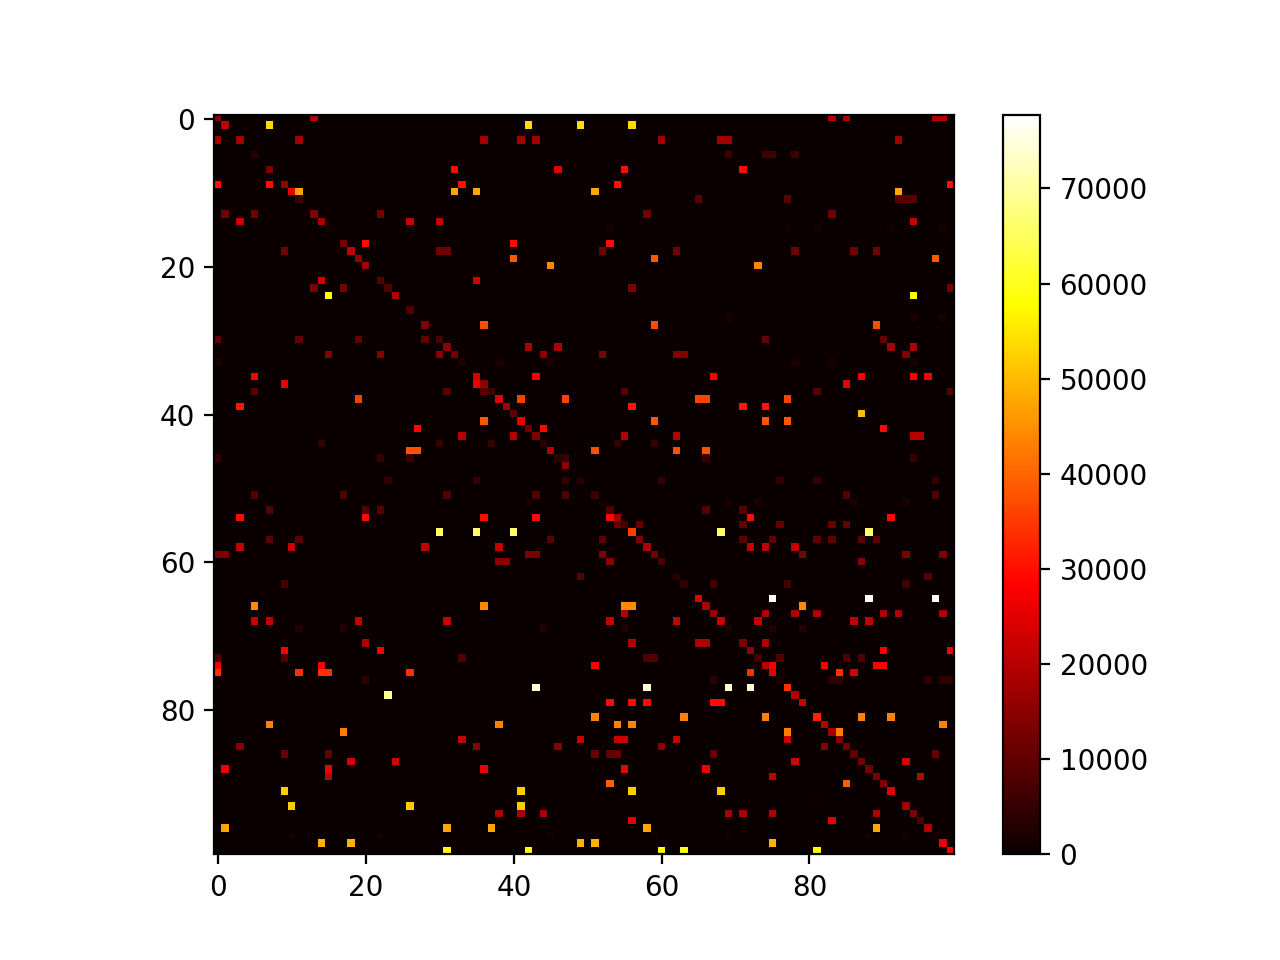

In [2]:
cash_vector = np.random.normal(10000, 10000, 100)
cash_vector[cash_vector <= 0] = 1*10**-10
# cash_vector[cash_vector > 5000] = 6500
cash_to_connectivity = lambda x: np.log(x).astype(int)
connectivity_vector = cash_to_connectivity(cash_vector)

# Make the adjacency matrix
mat = make_connections(connectivity_vector)
mat = binarize_probabilities(mat)
# Distribute liabilities
leverage_ratios = np.random.normal(10, 2, 100)
leverage_ratios[leverage_ratios < 5] = 5

liabilities = np.multiply(cash_vector, leverage_ratios)
mat = distribute_liabilities(mat, liabilities)
for i, cash in enumerate(cash_vector):
    mat[i, i] = cash
model = DeterministicRatioNetwork(100, mat)
model.reset_net()
model.show()

<IPython.core.display.Javascript object>


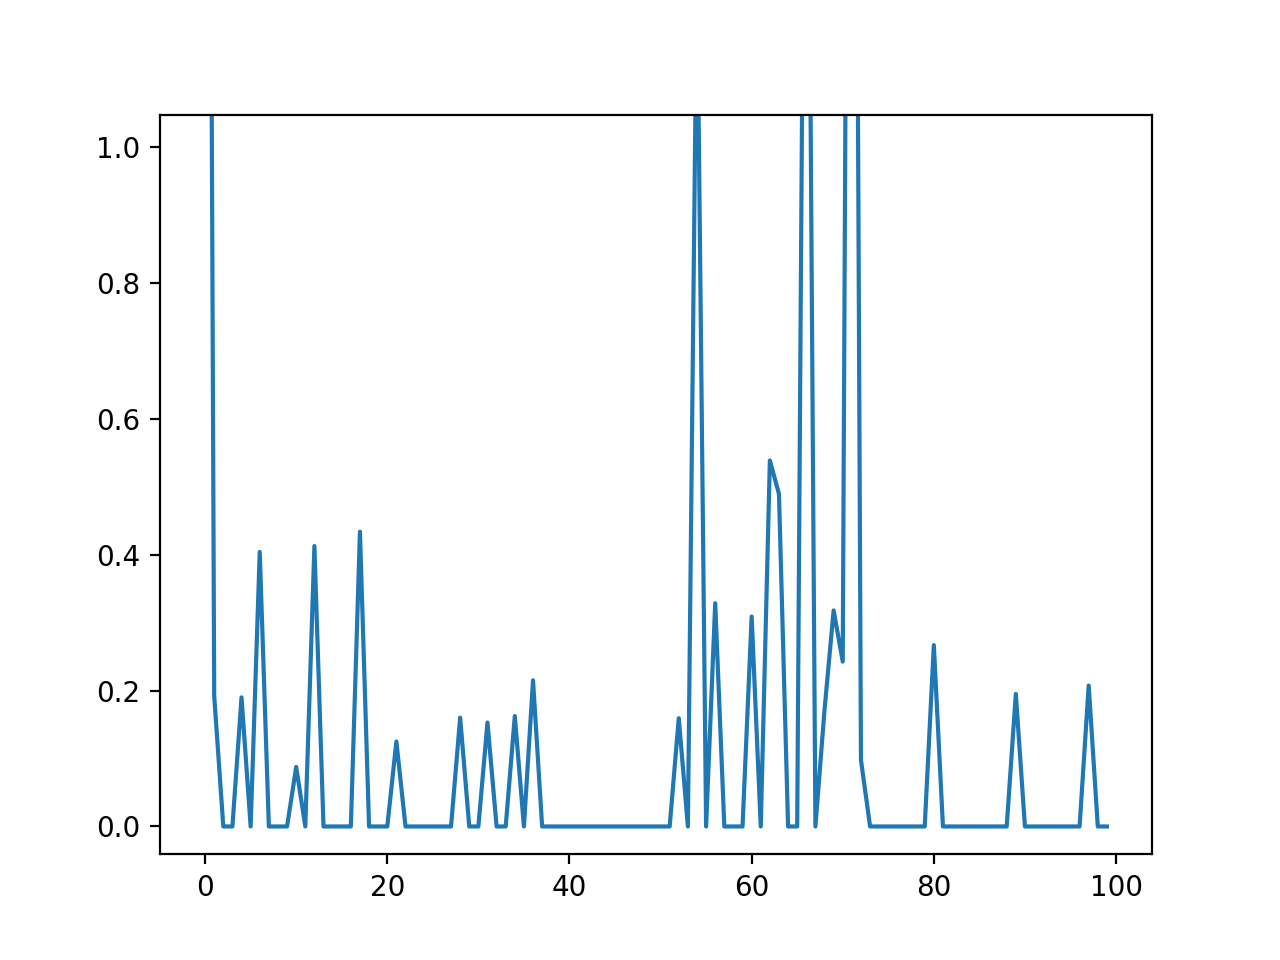

In [4]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(100))
# ax.set_ylim(0, 1)

model = DeterministicRatioNetwork(100, mat)
defaults_to_freq = {}


def update(data):
    ratios = data[0]
    defaults = data[1]
    if defaults in defaults_to_freq:
        defaults_to_freq[defaults] += 1
    else:
        defaults_to_freq[defaults] = 1
    line.set_ydata(ratios)
    return line,


def data_gen():
    for i in xrange(1000):
        yield model.step()

ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()